## Finding the total number of enteries in the files of job_events

In [10]:
import gzip
from pathlib import Path

In [11]:
def recursive_range(n):
    if n == 0:
        return []
    return recursive_range(n-1) + [n-1]

In [3]:

count=0
for i in recursive_range(500):
    num=str(i)
    zero_fill_num=num.zfill(5)
    with gzip.open('/ichec/work/mucom001c/GoogleSvrLog/clusterdata-2011-1/job_events/part-'+zero_fill_num+'-of-00500.csv.gz', 'rb') as f:
        for line in f:
            line=line.decode()
            line=line.split(',')
            t=line[0]
            count+=1
print(count)


2012242



Total number of enteries in the dataset :2012242

Average entry per file :4024.48

Data attributes in the file :8


## Finding the size of the zipped file:

In [4]:
from pathlib import Path
size=0
for i in recursive_range(500):
    num=str(i)
    zero_fill_num=num.zfill(5)
    size+=Path('/ichec/work/mucom001c/GoogleSvrLog/clusterdata-2011-1/job_events/part-'+zero_fill_num+'-of-00500.csv.gz').stat().st_size
print(size)


86559662



Total file size of the Zipped file :86559662 byte or 86.55MB

## Finding the date of the month for the number of job was run

{'26': 65579, '12': 65964, '22': 65258, '07': 65769, '05': 65947, '30': 60971, '27': 66318, '14': 66225, '06': 66262, '24': 65953, '31': 38752, '28': 65358, '16': 65846, '13': 66563, '01': 73873, '04': 66342, '09': 66204, '23': 64177, '03': 65367, '10': 66192, '11': 66016, '15': 66017, '19': 64675, '25': 65072, '08': 65978, '21': 64951, '17': 66020, '18': 66136, '20': 66635, '29': 61741, '02': 66081}


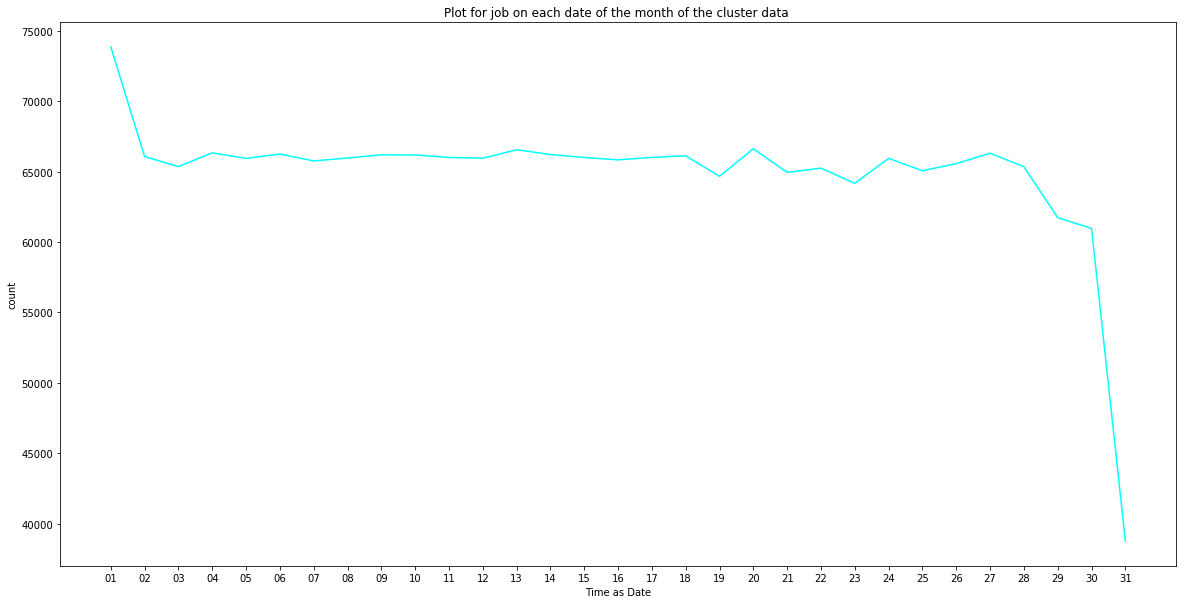

In [5]:

from matplotlib import pyplot as plt
from datetime import datetime
d=dict()
for i in recursive_range(500):
    num=str(i)
    zero_fill_num=num.zfill(5)
    with gzip.open('/ichec/work/mucom001c/GoogleSvrLog/clusterdata-2011-1/job_events/part-'+zero_fill_num+'-of-00500.csv.gz', 'rb') as f:
        for line in f:
            line=line.decode()
            line=line.split(',')
            t=int(line[0])/1000
            date_time = datetime.fromtimestamp(t)
            d1=date_time.strftime("%d")
            if d1 not in d:d[d1]=1
            else:
                 d[d1]+=1 
print(d)
lists = sorted(d.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.plot(x, y,color='cyan')
plt.xlabel('Time as Date')
plt.ylabel('count')
plt.title('Plot for job on each date of the month of the cluster data ')
plt.show()

## Finding the day of the month for number of jobs that was run

{'Wednesday': 287167, 'Tuesday': 285631, 'Friday': 284255, 'Sunday': 287910, 'Thursday': 294213, 'Monday': 285847, 'Saturday': 287219}


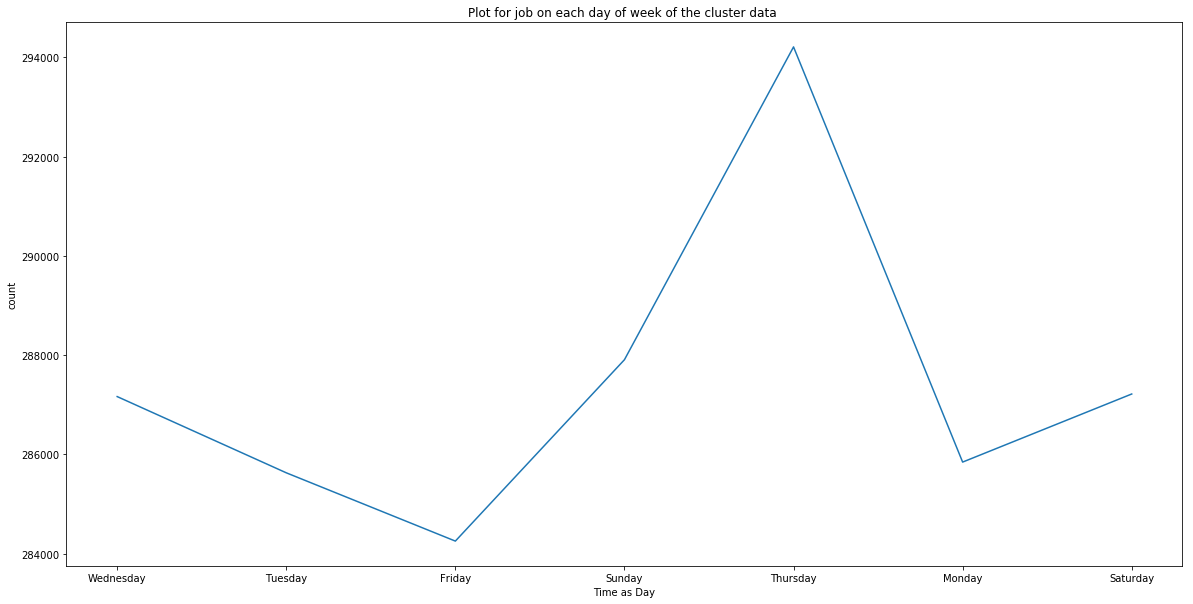

In [17]:

from matplotlib import pyplot as plt
from datetime import datetime
d=dict()
for i in recursive_range(500):
    num=str(i)
    zero_fill_num=num.zfill(5)
    with gzip.open('/ichec/work/mucom001c/GoogleSvrLog/clusterdata-2011-1/job_events/part-'+zero_fill_num+'-of-00500.csv.gz', 'rb') as f:
        for line in f:
            line=line.decode()
            line=line.split(',')
            t=int(line[0])/1000
            date_time = datetime.fromtimestamp(t)
            d1=date_time.strftime("%A")
            if d1 not in d:d[d1]=1
            else:
                 d[d1]+=1 
print(d)
lists = list(d.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.xlabel('Time as Day')
plt.ylabel('count')
plt.title('Plot for job on each day of week of the cluster data ')
plt.show()

## Finding the information about the misssing_info column 

{'': 2012223, '1': 16, '0': 3}


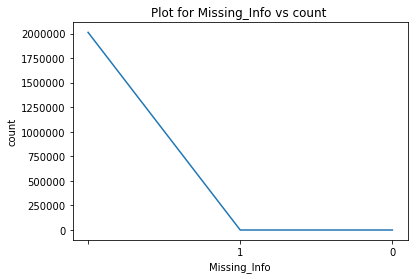

In [6]:
import gzip
from datetime import datetime
d=dict()
missing=list()
for i in recursive_range(500):
    num=str(i)
    zero_fill_num=num.zfill(5)
    with gzip.open('/ichec/work/mucom001c/GoogleSvrLog/clusterdata-2011-1/job_events/part-'+zero_fill_num+'-of-00500.csv.gz', 'rb') as f:
        for line in f:
            line=line.decode()
            line=line.split(',')
            t=line[1]
            if t not in d:
                d[t]=1
            else:
                d[t]+=1 
print(d)
lists = list(d.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.xlabel('Missing_Info')
plt.ylabel('count')
plt.title('Plot for Missing_Info vs count ')
plt.plot(x, y)
plt.show()


The total number of missing info column with blank fields are :2012223

The total number of column with value in the missing column is 16

The total number of column with value 0 are :3


## Finding the information about the job_id column

In [42]:
import gzip
from datetime import datetime
d=dict()
count=0
for i in recursive_range(500):
    num=str(i)
    zero_fill_num=num.zfill(5)
    with gzip.open('/ichec/work/mucom001c/GoogleSvrLog/clusterdata-2011-1/job_events/part-'+zero_fill_num+'-of-00500.csv.gz', 'rb') as f:
        for line in f:
            line=line.decode()
            line=line.split(',')
            t=line[2]
            if t not in d:d[t]=1
            else:
                d[t]+=1
for key,val in list(d.items()):
    count+=1
print(count)

672074


The total number of unique job id that was run in the system is :672074

Average number of times a job was run is about :2012242/672074 :is about 30



## Finding the information about the event_type column :

{'2': 22, '3': 10125, '0': 672075, '4': 385582, '5': 272341, '1': 672075, '8': 6, '6': 16}


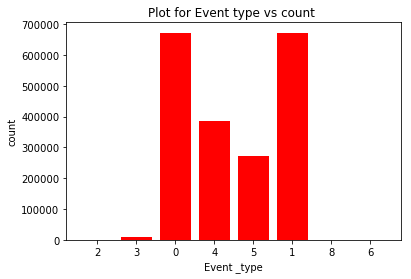

In [17]:
from matplotlib import pyplot as plt
import gzip
d=dict()
count=0
for i in recursive_range(500):
    num=str(i)
    zero_fill_num=num.zfill(5)
    with gzip.open('/ichec/work/mucom001c/GoogleSvrLog/clusterdata-2011-1/job_events/part-'+zero_fill_num+'-of-00500.csv.gz', 'rb') as f:
        for line in f:
            line=line.decode()
            line=line.split(',')
            t=line[3]
            if t not in d:d[t]=1
            else:
                d[t]+=1
print(d)
lists = list(d.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.xlabel('Event _type')
plt.ylabel('count')
plt.title('Plot for Event type vs count ')
plt.bar(x, y,color='red')
plt.show()


The unique type of job that was run is about 8.

The maximum type of event_type that was run is 0,1,4,5 and 3 whereas 2,6 and 8 are with minimal event run.

## Finding the total number of unique users running the jobs in the system

In [46]:
import matplotlib.pyplot as plt
d=dict()
count=0
for i in recursive_range(500):
    num=str(i)
    zero_fill_num=num.zfill(5)
    with gzip.open('/ichec/work/mucom001c/GoogleSvrLog/clusterdata-2011-1/job_events/part-'+zero_fill_num+'-of-00500.csv.gz', 'rb') as f:
        for line in f:
            line=line.decode()
            line=line.split(',')
            t=line[4]
            if t not in d:
                d[t]=1
                count+=1
            else:
                d[t]+=1
print(count)
            

933


The total number of unique users running the job is :933

## We can create a graph to look find the event type run by the users in a each date of the month


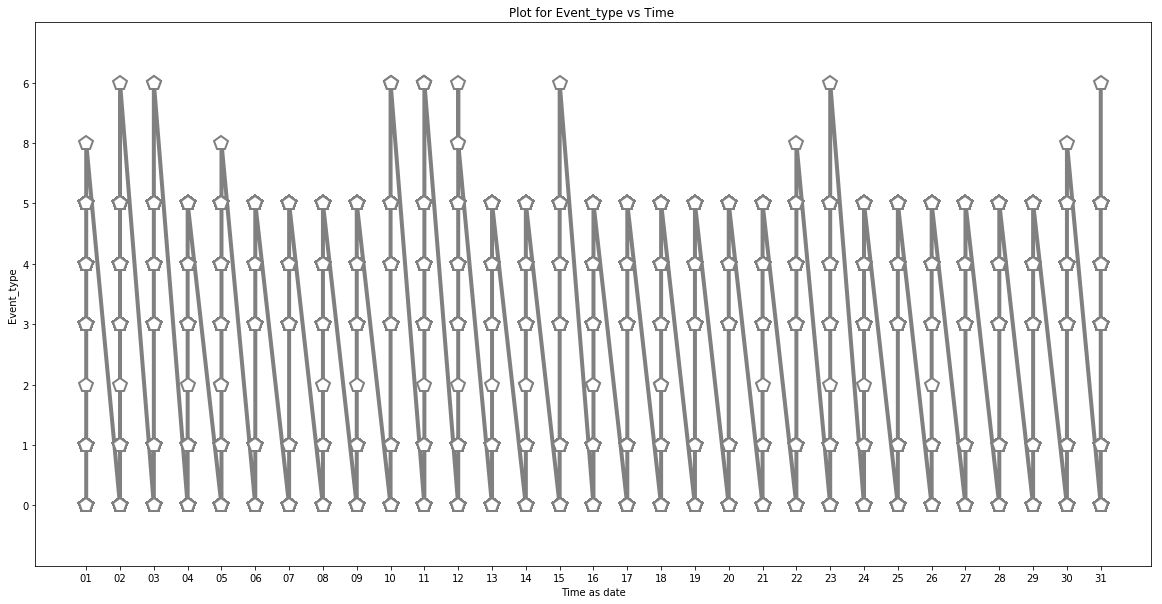

In [11]:
import matplotlib.pyplot as plt
from datetime import datetime
event_day=list()
count=0
for i in recursive_range(500):
    num=str(i)
    zero_fill_num=num.zfill(5)
    with gzip.open('/ichec/work/mucom001c/GoogleSvrLog/clusterdata-2011-1/job_events/part-'+zero_fill_num+'-of-00500.csv.gz', 'rb') as f:
        for line in f:
            line=line.decode()
            line=line.split(',')
            t=line[3]
            t1=int(line[0])/1000
            date_time = datetime.fromtimestamp(t1)
            d1=date_time.strftime("%d")
            event_day.append((d1,t))
            
event_day.sort()
plt.figure(figsize=(20,10))
x, y = zip(*event_day)
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.xlabel('Time as date')
plt.ylabel('Event_type')
plt.title('Plot for Event_type vs Time ')
plt.ylim(-1,8);

     
            
            

## We find the different type of scheduling class job run by user in each day of the month

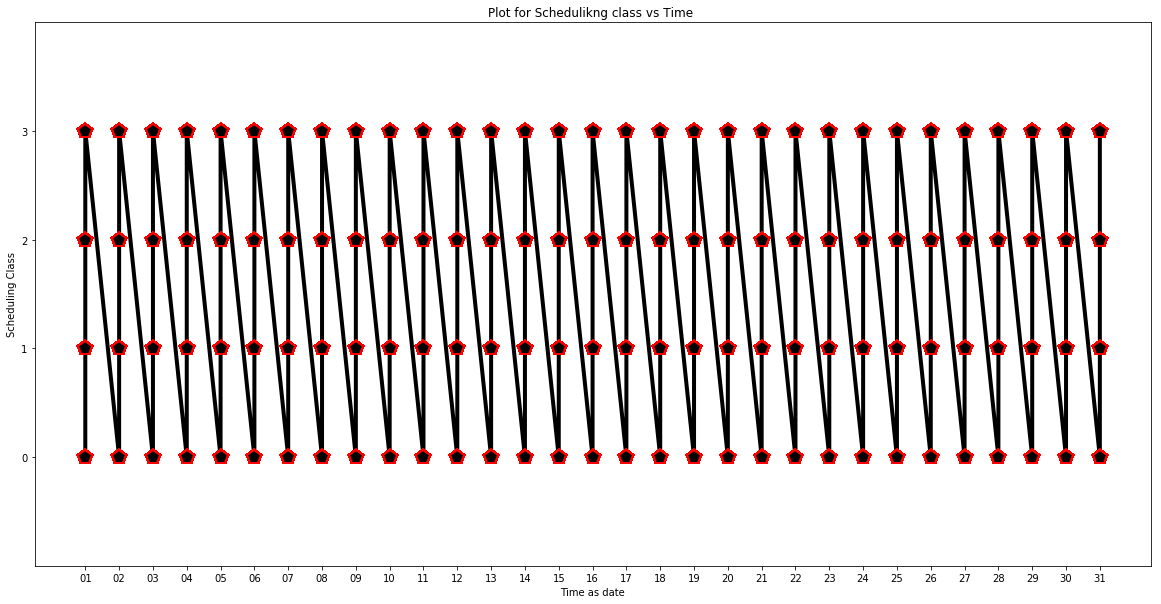

In [15]:
import matplotlib.pyplot as plt
from datetime import datetime
sch=list()
count=0
for i in recursive_range(500):
    num=str(i)
    zero_fill_num=num.zfill(5)
    with gzip.open('/ichec/work/mucom001c/GoogleSvrLog/clusterdata-2011-1/job_events/part-'+zero_fill_num+'-of-00500.csv.gz', 'rb') as f:
        for line in f:
            line=line.decode()
            line=line.split(',')
            t=line[5]
            t1=int(line[0])/1000
            date_time = datetime.fromtimestamp(t1)
            d1=date_time.strftime("%d")
            sch.append((d1,t))
sch.sort()
plt.figure(figsize=(20,10))
x, y = zip(*sch)
#plt.plot(x,y)
plt.plot(x,y, '-p', color='black',
          markersize=15, linewidth=4,
          markerfacecolor='black',
         markeredgecolor='red',
         markeredgewidth=2)
plt.xlabel('Time as date')
plt.ylabel('Scheduling Class')
plt.title('Plot for Schedulikng class vs Time ')
plt.ylim(-1, 4);

## We find the different categories of scheduling jobs that are available

{'3': 14684, '0': 771302, '2': 582340, '1': 643916}


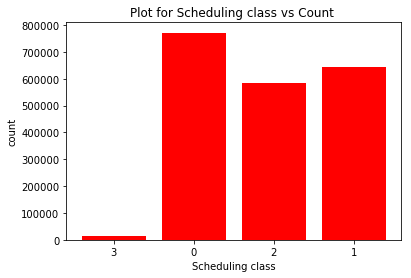

In [19]:
c1=dict()
for i in recursive_range(500):
    num=str(i)
    zero_fill_num=num.zfill(5)
    with gzip.open('/ichec/work/mucom001c/GoogleSvrLog/clusterdata-2011-1/job_events/part-'+zero_fill_num+'-of-00500.csv.gz', 'rb') as f:
        for line in f:
            line=line.decode()
            line=line.split(',')
            z=line[5]
            if z not in c1:
                c1[z]=1
            else:
                c1[z]+=1
print(c1)
lists = list(c1.items()) # sorted by key, return a list of tuples
x, y = zip(*lists)
plt.bar(x,y,color='red')
plt.xlabel('Scheduling class')
plt.ylabel('count')
plt.title('Plot for Scheduling class vs Count ')
plt.show()
                   

We can infer that type 3 of scheduling class job are run the lowest when compared to the other three jobs.

In [2]:
import os
def setup_my_environment():
    import os
    
def setenv(var, val):
    os.environ[var] = val

def prepend_path(var, val):
    old_val = os.environ.get(var, '')
    os.environ[var] = val + ":" + old_val
    
def setup_java():
    PKG_ROOT='/ichec/packages/java/8'
    setenv('JAVA_PATH', PKG_ROOT)
    setenv('JAVA_HOME', PKG_ROOT)
    prepend_path('PATH', PKG_ROOT + '/bin')
    prepend_path('MANPATH', PKG_ROOT + '/man')
    prepend_path('CPATH', PKG_ROOT + '/include')
    
def setup_spark():
    PKG_ROOT='/ichec/packages/spark/2.3.3/kay/spark-2.3.3'
    setenv('SPARK_DIST_CLASSPATH', PKG_ROOT + 'spark-2.3.3-bin-kay-spark')
    prepend_path('PATH', PKG_ROOT + PKG_ROOT + 'spark-2.3.3-bin-kay-spark/bin')
setup_java()
setup_spark()
setup_my_environment()
from pyspark import SparkConf
from pyspark.context import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession

 

spark = SparkSession \
    .builder \
    .config("spark.executor.memory", "70g") \
    .config("spark.driver.memory", "90g") \
    .config("spark.memory.offHeap.enabled","true")\
    .config("spark.memory.offHeap.size","25g")\
    .config("spark.debug.maxToStringsFields","100")\
    .appName("GoogleSvrLog") \
    .getOrCreate()

In [3]:
df = spark.read.csv("/ichec/work/mucom001c/GoogleSvrLog/clusterdata-2011-1/job_events/*.gz")

In [4]:
df1=df.select('_c0','_c2','_c3','_c5')
df1=df1.selectExpr('_c0 as time','_c2 as job_id','_c3 as event_type','_c5 as scheduling_class')

In [5]:
df1.show(5)

+----+-------+----------+----------------+
|time| job_id|event_type|scheduling_class|
+----+-------+----------+----------------+
|   0|3418309|         0|               3|
|   0|3418314|         0|               3|
|   0|3418319|         0|               3|
|   0|3418324|         0|               3|
|   0|3418329|         0|               3|
+----+-------+----------+----------------+
only showing top 5 rows



In [6]:
from pyspark.sql.types import IntegerType
df1 = df1.withColumn("time",df1["time"].cast(IntegerType()))
df1 = df1.withColumn("job_id", df1["job_id"].cast(IntegerType()))
df1 = df1.withColumn("event_type", df1["event_type"].cast(IntegerType()))
df1 = df1.withColumn("scheduling_class", df1["scheduling_class"].cast(IntegerType()))

In [27]:
df1 = df1.fillna(0)
features = df1.rdd.map(lambda row: row[0:])
from pyspark import SparkContext
from pyspark.mllib.stat import Statistics

corr_mat=Statistics.corr(features, method="pearson")



## finding the correlation matrix between the given data 

In [33]:
cor_mat=corr_mat.tolist()

In [36]:
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
columns=['time','job_id','event_type','sched_cls']
df = spark.createDataFrame(cor_mat,columns)
df.show()

+--------------------+--------------------+--------------------+--------------------+
|                time|              job_id|          event_type|           sched_cls|
+--------------------+--------------------+--------------------+--------------------+
|                 1.0|-2.64724320823031...|-7.73159230877202E-4|-8.77781522902693...|
|-2.64724320823031...|                 1.0|-0.00774911851258283|0.017030030592291894|
|-7.73159230877202E-4|-0.00774911851258283|                 1.0|-0.00828455278889...|
|-8.77781522902693...|0.017030030592291894|-0.00828455278889...|                 1.0|
+--------------------+--------------------+--------------------+--------------------+



## Creating a graph for the correlation matrix 

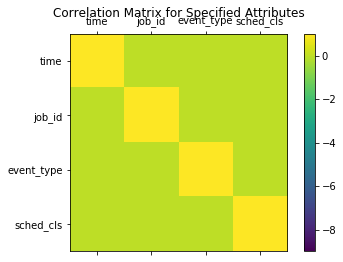

In [42]:
def plot_corr_matrix(correlations,attr,fig_no):
    fig=plt.figure(fig_no)
    ax=fig.add_subplot(111)
    ax.set_title("Correlation Matrix for Specified Attributes")
    ax.set_xticklabels(['']+attr)
    ax.set_yticklabels(['']+attr)
    cax=ax.matshow(correlations,vmax=1,vmin=-9)
    fig.colorbar(cax)
    plt.show()

plot_corr_matrix(cor_mat, columns,1)